In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import process_psychopy_data

In [ ]:
## Read data file csv
csv_path = 'data/data_pilot_eye.csv'
    
groups = [
    ['blockTrials.thisN', 'trials.thisN'],
     ['breakLoop.thisN', 'blockTrials2.thisN', 'trials2.thisN'],
]

trials = process_psychopy_data(csv_path,groups)
trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blockTrials.thisN           90 non-null     float64
 1   trials.thisN                90 non-null     float64
 2   participant                 355 non-null    object 
 3   session                     355 non-null    int64  
 4   currentTrialID              355 non-null    float64
 5   startId                     355 non-null    float64
 6   targetId                    355 non-null    float64
 7   speed                       355 non-null    float64
 8   turn                        355 non-null    float64
 9   score                       355 non-null    float64
 10  visualMode                  355 non-null    int64  
 11  frameN                      355 non-null    float64
 12  producedDuration            354 non-null    float64
 13  producedDuration_attempt_2  104 non

/Users/dexhrestha/Documents/Portfolio/neuronepal/neuronepal/data-analysis-pipeline/notebooks/utils/utils.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  list_columns = trials.columns[trials.applymap(type).eq(list).any()]
/Users/dexhrestha/Documents/Portfolio/neuronepal/neuronepal/data-analysis-pipeline/notebooks/utils/utils.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  list_columns = trials.columns[trials.applymap(type).eq(list).any()]


In [4]:
trials.to_csv('processed_psychopy.csv')

In [5]:
trials.to_csv('processed_psychopy.csv',index=False)

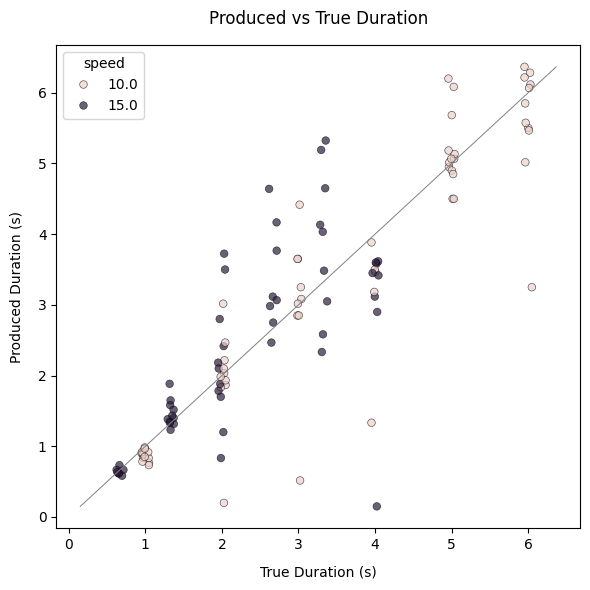

In [11]:
%matplotlib inline
# Filter data
df = trials[trials['visualMode']==0][['producedDuration_s', 'trueDuration_s','speed']].copy()

# Add jitter to trueDuration_s for visualization
jitter_strength = 0.05
df['trueDuration_s_jittered'] = df['trueDuration_s'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))

# Set Seaborn theme for academic-style plots
# sns.set_theme(font_scale=1.2, rc={"figure.dpi": 300})

# Create figure and axis
plt.figure(figsize=(6, 6))


min_val = min(df['trueDuration_s'].min(), df['producedDuration_s'].min())
max_val = max(df['trueDuration_s'].max(), df['producedDuration_s'].max())
plt.plot([min_val, max_val], [min_val, max_val], '-', color='grey', linewidth=0.7)

# Plot scatter with jittered x-axis
sns.scatterplot(
    data=df,
    x='trueDuration_s_jittered',
    y='producedDuration_s',
    s=30,  # point size
    alpha=0.7,
    edgecolor='black',
    hue='speed'
)



# Labels and title
plt.xlabel('True Duration (s)', labelpad=10)
plt.ylabel('Produced Duration (s)', labelpad=10)
plt.title('Produced vs True Duration', pad=15)

# Clean layout
plt.tight_layout()
plt.show()


# Load eye data mat file


In [21]:
import pandas as pd

# Load PsychoPy CSV
psycho = pd.read_csv('data/data_pilot_eye.csv')  # make sure it has a 'time' or 'onset' column

# Load EyeLink data (from CSV or .mat)
eye = pd.read_csv('results/eye_sync_data.csv')
# OR if using .mat:
# import mat73
# eye_data = mat73.loadmat('eye_sync_data.mat')


In [23]:
eye.head()

,et_time,posX,posY
0,3151185,990.200012,539.799988
1,3151186,990.200012,539.799988
2,3151186,990.599976,540.099976
3,3151187,990.599976,540.099976
4,3151187,990.599976,538.900024
